In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.layers import Dense
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.losses import MeanSquaredError
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [3]:
data=pd.read_csv('wdbc.csv')
data['v2']=data['v2'].astype(str)
data['v2']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: v2, Length: 569, dtype: object

In [4]:
df = pd.DataFrame({'feature': ['M' , 'B']})
mapp={'M':1 ,'B':0 }
data['v2'] = data['v2'].apply(lambda val: 0 if val== 'B' else 1)
data


,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
X=data.drop('v2' ,axis=1)
y=data['v2']
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: v2, Length: 569, dtype: int64

In [6]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)


In [7]:
scl = MinMaxScaler().fit(X_train)
X_train = scl.transform(X_train)
scl=MinMaxScaler().fit(X_val)
X_val = scl.transform(X_val)
scl = MinMaxScaler().fit(X_test)
X_test = scl.transform(X_test)

X_train_2 = scl.inverse_transform(X_train)
X_train_2

array([[9.37591021e+05, 8.03657775e+00, 1.64435610e+01, ...,
        1.59364261e-01, 3.75352257e-01, 9.46787640e-02],
       [9.51711809e+05, 1.75517670e+01, 2.18681941e+01, ...,
        2.64362543e-01, 3.66255076e-01, 1.00673025e-01],
       [9.37316044e+05, 8.15018253e+00, 1.44063882e+01, ...,
        4.63249141e-02, 3.09152770e-01, 7.67509749e-02],
       ...,
       [8.98815021e+06, 1.21870968e+01, 1.61441495e+01, ...,
        3.03520619e-02, 2.51490637e-01, 6.37175822e-02],
       [9.86604815e+05, 1.19425310e+01, 1.77879777e+01, ...,
        1.66376289e-01, 3.01945003e-01, 8.80795778e-02],
       [9.41084721e+05, 1.05224712e+01, 1.83163510e+01, ...,
        6.76706186e-02, 2.68005519e-01, 6.78860682e-02]])

In [8]:
model=Sequential([

    Dense(64 , activation='relu' , name='L1'),
      Dense(1 , activation='sigmoid' , name='l2' )

])


In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [10]:
model.fit(X_train, y_train, epochs=60, validation_data=(X_val, y_val))

Epoch 1/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.6952 - val_loss: 0.6506
Epoch 2/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6425 - val_loss: 0.5934
Epoch 3/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5897 - val_loss: 0.5331
Epoch 4/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5469 - val_loss: 0.4752
Epoch 5/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4945 - val_loss: 0.4314
Epoch 6/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4500 - val_loss: 0.3823
Epoch 7/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4099 - val_loss: 0.3441
Epoch 8/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3571 - val_loss: 0.3095
Epoch 9/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3364 - val_loss: 0.2794
Epoch 10/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3086 - val_loss: 0.2677
Epoch 11/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2956 - val_loss: 0.2401
Epoch 12/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2782 - val_lo

In [11]:
pred=model.predict(X_test)
pred


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[9.9949461e-01],
       [7.7643330e-05],
       [1.3261840e-03],
       [3.9690636e-02],
       [4.3565485e-01],
       [2.0919509e-01],
       [9.9625021e-01],
       [9.9993646e-01],
       [1.6294010e-01],
       [9.9958605e-01],
       [2.0216126e-03],
       [9.9124146e-01],
       [9.9999994e-01],
       [9.1432822e-01],
       [1.9127221e-05],
       [5.0532925e-01],
       [5.3236552e-02],
       [4.3946154e-02],
       [3.3478560e-03],
       [1.9936210e-02],
       [9.9986297e-01],
       [6.0170197e-01],
       [1.7129123e-01],
       [3.8373326e-03],
       [1.0000000e+00],
       [1.4872574e-02],
       [4.6303427e-01],
       [9.9999994e-01],
       [6.3321638e-01],
       [1.0000000e+00],
       [5.7251989e-03],
       [9.9870872e-01],
       [2.8428044e-03],
       [3.5926908e-01],
       [5.8312863e-02],
       [7.1336173e-02],
       [1.0000000e+00],
       [6.1385375e-01],
       [1.9991646e-02],
       [3.1324271e-02],
       [1.0000000e+00],
       [7.980541

In [12]:
for i in range(len(pred)):
    if pred[i] >=.5:
        pred[i]=1
    else :
        pred[i]=0
pred

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]], dtype=float32)

In [13]:
accuracy = accuracy_score(pred, y_test)
accuracy

0.8771929824561403

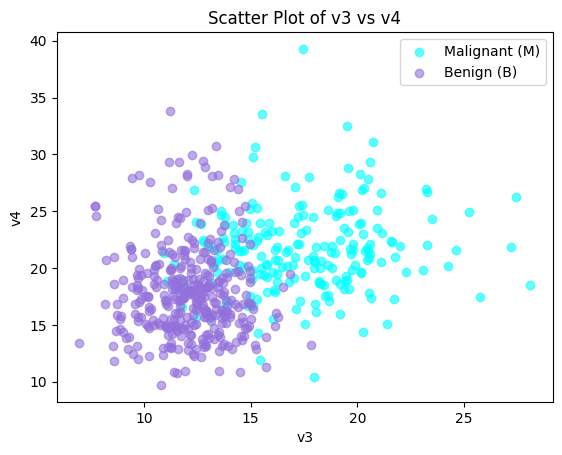

In [15]:
import matplotlib.pyplot as plt

feature1 = 'v3'
feature2 = 'v4'

data_m = data[data['v2'] == 1]
data_b = data[data['v2'] == 0]

plt.scatter(data_m[feature1], data_m[feature2], color='cyan', label='Malignant (M)', alpha=0.6)
plt.scatter(data_b[feature1], data_b[feature2], color='mediumpurple', label='Benign (B)', alpha=0.6)

plt.title(f'Scatter Plot of {feature1} vs {feature2}')
plt.xlabel(feature1)
plt.ylabel(feature2)

plt.legend()

plt.show()